In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [5]:
train_data = pd.read_csv("/Users/gaganpuri/Documents/Broadway/datasets/digit-recognizer/train.csv")

In [6]:
train_data.shape

(42000, 785)

In [57]:
train_data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train_data.isnull().any().any()

False

In [15]:
train_data['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

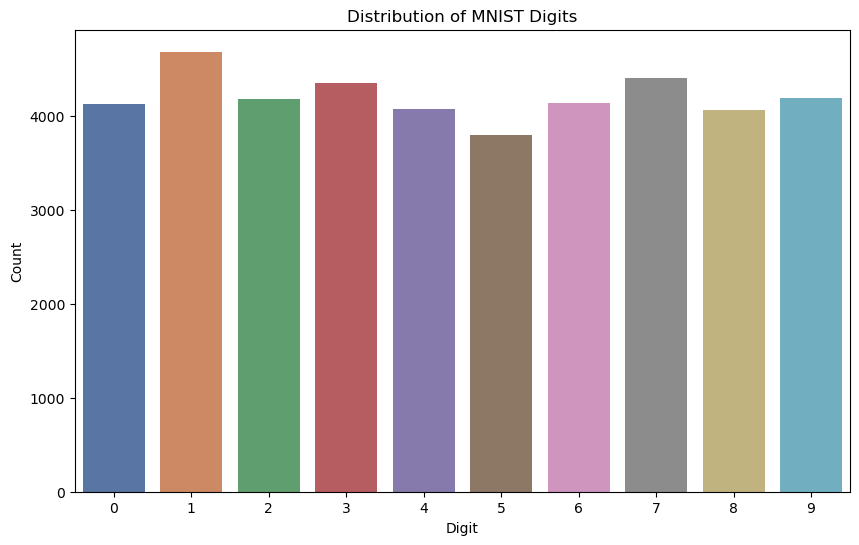

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='label', data=train_data, palette='deep', hue='label', legend=False)
plt.title('Distribution of MNIST Digits')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

(784,)


Text(0.5, 1.0, 'Digit 4')

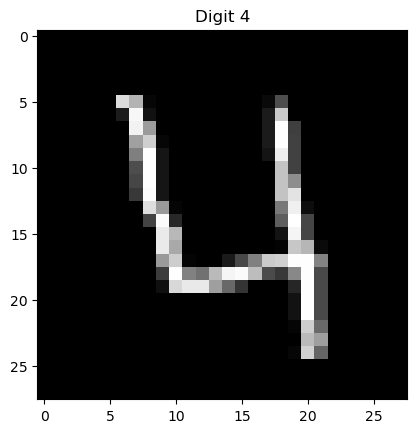

In [59]:
digit = train_data.iloc[3, 1:]
print(digit.shape)

digit = digit.values.reshape(28,28)
plt.imshow(digit, cmap='gray')
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 4')

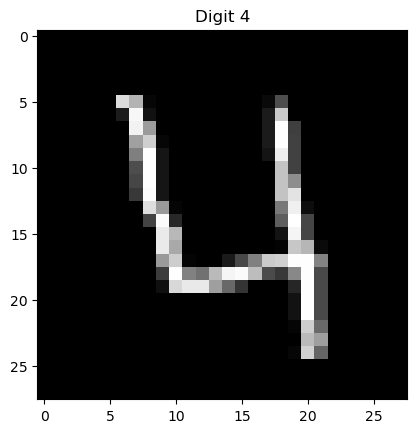

In [50]:
X = train_data.drop(columns = 'label')
y = train_data['label']

In [ ]:
# take a white paper --> write a handwritten digit maybe 8 --> take a picture from the celing ---> crop it to look lit the above image 
# We will learn opencv later but for now use opencv to do resizing, resize it to 28X28 
# --> threshold/invert the color (black white white black)
# predict the degit from the svm model we trained using Mnist dataset

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [54]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize SVM with linear kernel (multi-class handled by default with one-vs-one)
svm_clf = SVC(kernel='linear', random_state=42)

# Train
svm_clf.fit(X_train_scaled, y_train)

# Predict
y_pred = svm_clf.predict(X_test_scaled)

# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       816
           1       0.95      0.99      0.97       909
           2       0.90      0.92      0.91       846
           3       0.89      0.89      0.89       937
           4       0.91      0.94      0.92       839
           5       0.87      0.88      0.88       702
           6       0.95      0.95      0.95       785
           7       0.94      0.92      0.93       893
           8       0.92      0.87      0.89       835
           9       0.92      0.88      0.90       838

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define the parameter grid to search over
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],   # kernels to try
    'C': [0.1, 1, 10],                     # regularization parameter
    'gamma': ['scale', 'auto']             # kernel coefficient for 'rbf' and 'poly'
}

# Initialize the SVM classifier
svm_clf = SVC(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

# Fit grid search on training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

# Predict using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Evaluate
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=17.5min
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 2.5min
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=10.4min
[CV] END .......................C=1, gamma=auto, kernel=poly; total time=12.7min
[CV] END ....................C=10, gamma=auto, kernel=linear; total time= 3.2min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=17.5min
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 2.5min
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=10.5min
[CV] END .......................C=1, gamma=auto, kernel=poly; total time=12.7min
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time= 6.3min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 8.9min
[CV] END .....................C=0.1, gamma=auto,